In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

import scipy.stats as stats # For Statistical Tests
from statsmodels.api import OLS #OLS Purpose
import matplotlib.pyplot as plt # Plots and Visualization
import seaborn as sns # Plots and Visualization

In [2]:
df_orders = pd.read_csv('orders.csv')
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
#As the dataset has around 3 million orders,we have taken a sample of 10k users from a base of 200k users to
#achive faster computations

In [3]:
usersample = df_orders.loc[df_orders['eval_set']=='prior']
usersample.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
#making a list out of all the unique users
userid_tolist = usersample["user_id"].unique().tolist()
len(userid_tolist)

206209

In [5]:
import random

In [6]:
#Taking a of 10k users from the 200k users using random sampling on the range of 200k users
rand_10kusers = random.sample(range(len(userid_tolist)),10000)
rand_10kusers.sort()
#choosing the user id which is present in the sample of 10k users
listofusers = [userid_tolist[i] for i in rand_10kusers]

In [7]:
#taking order information for the sampled users alone
orders_sample = df_orders[df_orders['user_id'].isin(listofusers)]

#now create a list of order_ids from sampled orders
orders_list = orders_sample["order_id"].unique().tolist()
print(len(orders_list))

167383


In [16]:
len(listofusers)

10000

In [8]:
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_train = pd.read_csv('order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
df_products = pd.read_csv('products.csv')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
df_aisles = pd.read_csv('aisles.csv')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
df_departments = pd.read_csv('departments.csv')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
prior_sample = order_products_prior[order_products_prior['order_id'].isin(orders_list)]
len(prior_sample)

1594425

In [15]:
df_final = pd.merge(df_orders,prior_sample,on = 'order_id',how = 'inner')
df_final = pd.merge(df_final,df_products,on = 'product_id',how = 'left')
df_final = pd.merge(df_final,df_departments,on = 'department_id',how = 'left')
df_final = pd.merge(df_final,df_aisles,on = 'aisle_id',how = 'left')

In [16]:
df_final.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1483446,12,prior,1,1,12,NaN,17159,1,0,Rhubarb,83,4,produce,fresh vegetables
1,1483446,12,prior,1,1,12,NaN,21616,2,0,Organic Baby Arugula,123,4,produce,packaged vegetables fruits
2,1483446,12,prior,1,1,12,NaN,40377,3,0,Unrefined Virgin Coconut Oil,19,13,pantry,oils vinegars
3,1247527,12,prior,2,5,9,30.0,13176,1,0,Bag of Organic Bananas,24,4,produce,fresh fruits
4,1247527,12,prior,2,5,9,30.0,10863,2,0,Grain Free Turkey & Salmon Formula Cat Food,41,8,pets,cat food care


In [31]:
df_final = pd.merge(prior_sample,df_products, on = ['product_id','product_id'])
df_final = pd.merge(df_final,df_orders,on=['order_id','order_id'])
df_final = pd.merge(df_final,df_aisles,on=['aisle_id','aisle_id'])
df_final = pd.merge(df_final,df_departments, on=['department_id', 'department_id'])
print(df_final.shape)
df_final.head(10)

(1568267, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,23,25931,1,1,Organic Baby Spinach Salad,123,4,68572,prior,21,1,18,8.0,packaged vegetables fruits,produce
1,679,25931,1,1,Organic Baby Spinach Salad,123,4,102514,prior,14,4,14,3.0,packaged vegetables fruits,produce
2,6889,25931,3,1,Organic Baby Spinach Salad,123,4,93465,prior,2,2,8,6.0,packaged vegetables fruits,produce
3,6889,32465,8,1,Sliced White Mushrooms,123,4,93465,prior,2,2,8,6.0,packaged vegetables fruits,produce
4,7284,25931,5,1,Organic Baby Spinach Salad,123,4,75745,prior,13,5,12,10.0,packaged vegetables fruits,produce
5,10553,25931,4,1,Organic Baby Spinach Salad,123,4,32574,prior,2,0,16,7.0,packaged vegetables fruits,produce
6,14666,25931,4,0,Organic Baby Spinach Salad,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
7,14666,38028,10,0,White Sliced Mushrooms,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
8,14666,40897,7,0,Kale,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
9,19029,25931,4,1,Organic Baby Spinach Salad,123,4,183836,prior,3,0,12,30.0,packaged vegetables fruits,produce


In [17]:
df_final.to_csv('new_instacart_sample_data.csv')

In [4]:
data  = pd.read_csv('instacart_data_for_submission.csv',index_col= 0)
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2333802,68,prior,1,5,10,30.0,39275,1,0,Organic Blueberries,123,4,produce,packaged vegetables fruits
1,2333802,68,prior,1,5,10,30.0,5991,2,0,Bok Choy,83,4,produce,fresh vegetables
2,2333802,68,prior,1,5,10,30.0,26384,3,0,Large Brown Eggs,86,16,dairy eggs,eggs
3,2333802,68,prior,1,5,10,30.0,47209,4,0,Organic Hass Avocado,24,4,produce,fresh fruits
4,2333802,68,prior,1,5,10,30.0,40706,5,0,Organic Grape Tomatoes,123,4,produce,packaged vegetables fruits


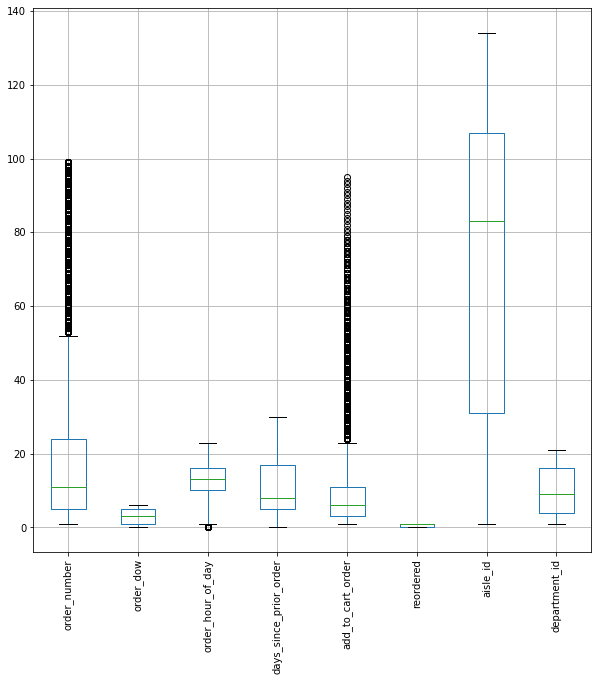

In [7]:
plt.figure(figsize= (10,10))
data = data.drop(['product_id','user_id'],axis = 1)
data.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

In [3]:
data.shape

(1568267, 15)

In [4]:
data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle', 'department'],
      dtype='object')

In [5]:
data.shape

(1568267, 15)

In [6]:
data.isnull().sum()
#Null values are present in the 'days since prior order' column only.The column has null value if
#there are no previous orders and hence it can be imputed with zeroes

order_id                       0
product_id                     0
add_to_cart_order              0
reordered                      0
product_name                   0
aisle_id                       0
department_id                  0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    100108
aisle                          0
department                     0
dtype: int64

In [7]:
na_data = data.isnull().sum()
na_data/data.isnull().count()

order_id                  0.000000
product_id                0.000000
add_to_cart_order         0.000000
reordered                 0.000000
product_name              0.000000
aisle_id                  0.000000
department_id             0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.063834
aisle                     0.000000
department                0.000000
dtype: float64

In [8]:
(pd.isna(data.days_since_prior_order) & (data['order_number'] != 1)).value_counts()

False    1568267
dtype: int64

In [9]:
data.days_since_prior_order = data['days_since_prior_order'].fillna(0)
data.days_since_prior_order.unique()

array([ 8.,  3.,  6., 10.,  7., 26., 30., 29., 22.,  4., 15., 27.,  0.,
        5.,  9.,  2., 14., 11., 13., 18., 12., 28.,  1., 16., 21., 24.,
       23., 17., 19., 20., 25.])

In [10]:
data.head(30)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,23,25931,1,1,Organic Baby Spinach Salad,123,4,68572,prior,21,1,18,8.0,packaged vegetables fruits,produce
1,679,25931,1,1,Organic Baby Spinach Salad,123,4,102514,prior,14,4,14,3.0,packaged vegetables fruits,produce
2,6889,25931,3,1,Organic Baby Spinach Salad,123,4,93465,prior,2,2,8,6.0,packaged vegetables fruits,produce
3,6889,32465,8,1,Sliced White Mushrooms,123,4,93465,prior,2,2,8,6.0,packaged vegetables fruits,produce
4,7284,25931,5,1,Organic Baby Spinach Salad,123,4,75745,prior,13,5,12,10.0,packaged vegetables fruits,produce
5,10553,25931,4,1,Organic Baby Spinach Salad,123,4,32574,prior,2,0,16,7.0,packaged vegetables fruits,produce
6,14666,25931,4,0,Organic Baby Spinach Salad,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
7,14666,38028,10,0,White Sliced Mushrooms,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
8,14666,40897,7,0,Kale,123,4,2823,prior,7,6,11,26.0,packaged vegetables fruits,produce
9,19029,25931,4,1,Organic Baby Spinach Salad,123,4,183836,prior,3,0,12,30.0,packaged vegetables fruits,produce


In [59]:
data.aisle.unique()

array(['packaged vegetables fruits', 'fresh vegetables', 'fresh fruits',
       'fresh herbs', 'packaged produce', 'dry pasta',
       'grains rice dried goods', 'fresh pasta', 'pasta sauce',
       'instant foods', 'frozen vegan vegetarian', 'frozen produce',
       'frozen pizza', 'frozen meals', 'frozen appetizers sides',
       'ice cream ice', 'frozen meat seafood', 'frozen breakfast',
       'frozen breads doughs', 'frozen dessert', 'frozen juice',
       'tofu meat alternatives', 'fresh dips tapenades', 'lunch meat',
       'prepared meals', 'prepared soups salads', 'other creams cheeses',
       'cream', 'soy lactosefree', 'milk', 'packaged cheese', 'yogurt',
       'specialty cheeses', 'eggs', 'butter',
       'refrigerated pudding desserts', 'salad dressing toppings',
       'honeys syrups nectars', 'spices seasonings', 'oils vinegars',
       'baking ingredients', 'pickled goods olives',
       'doughs gelatins bake mixes', 'preserved dips spreads', 'spreads',
       'condim

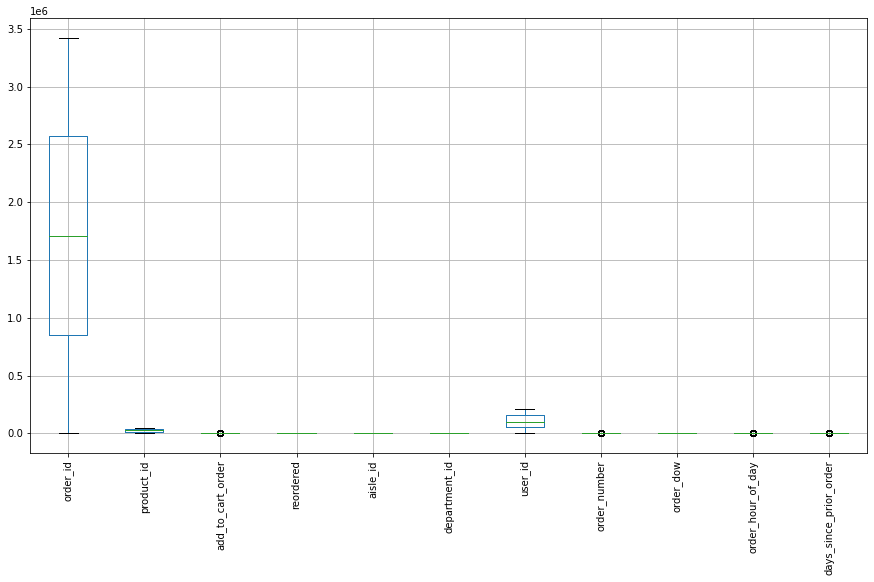

In [60]:
plt.figure(figsize= (15,8))
data.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

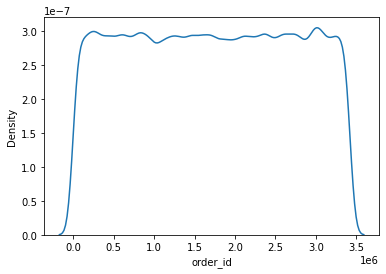

In [61]:
sns.kdeplot(data.order_id);

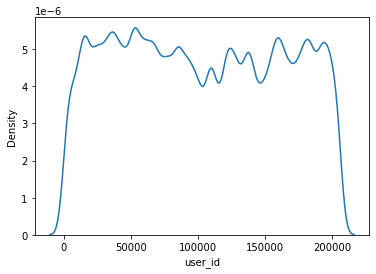

In [62]:
sns.kdeplot(data.user_id);

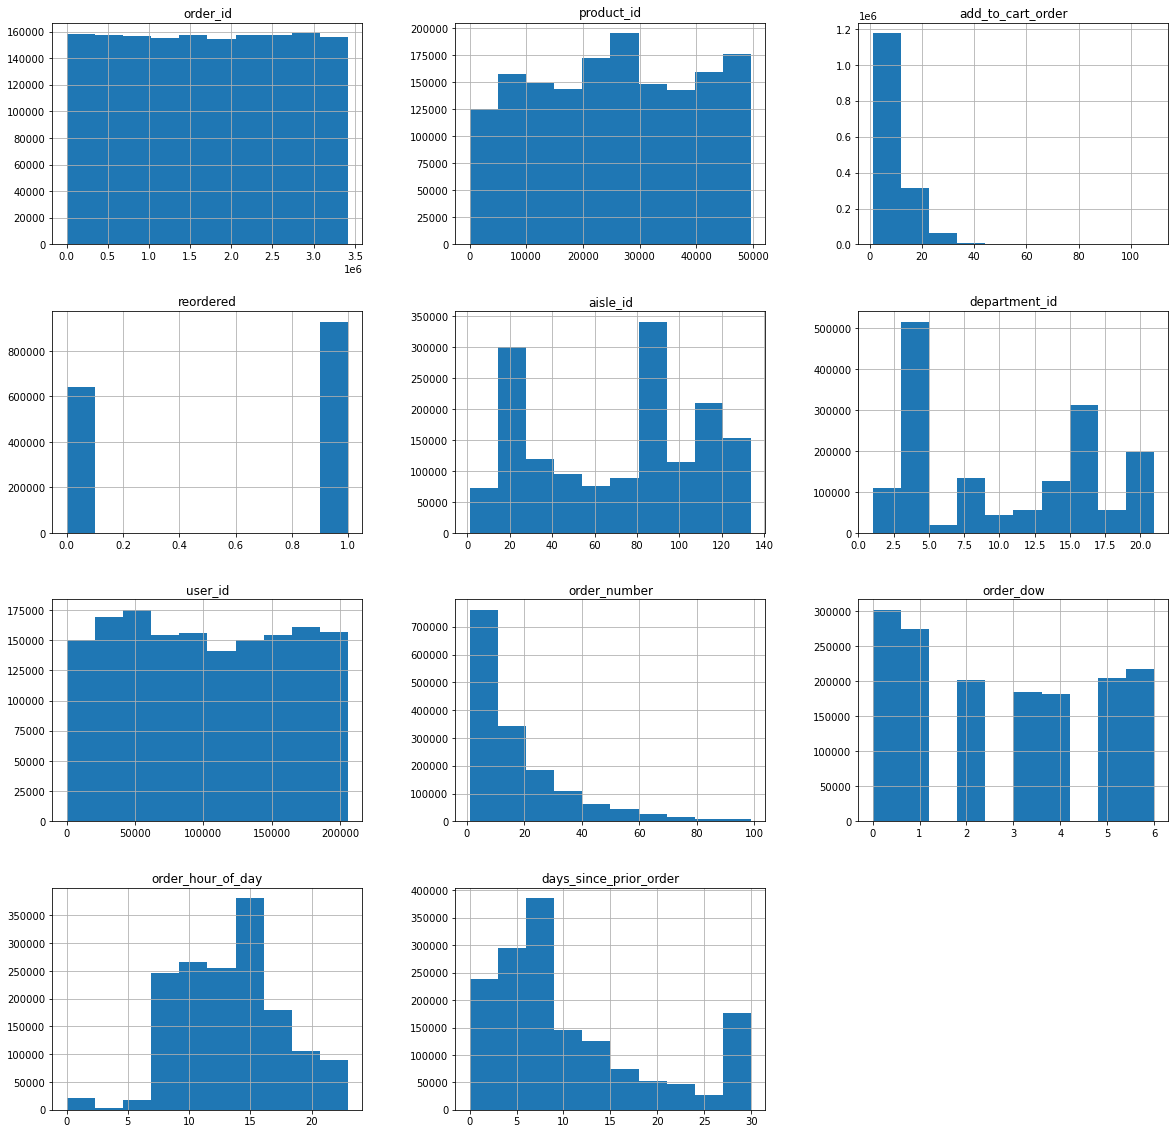

In [65]:
#Detecting the outliers
data.hist(figsize = (20,20));

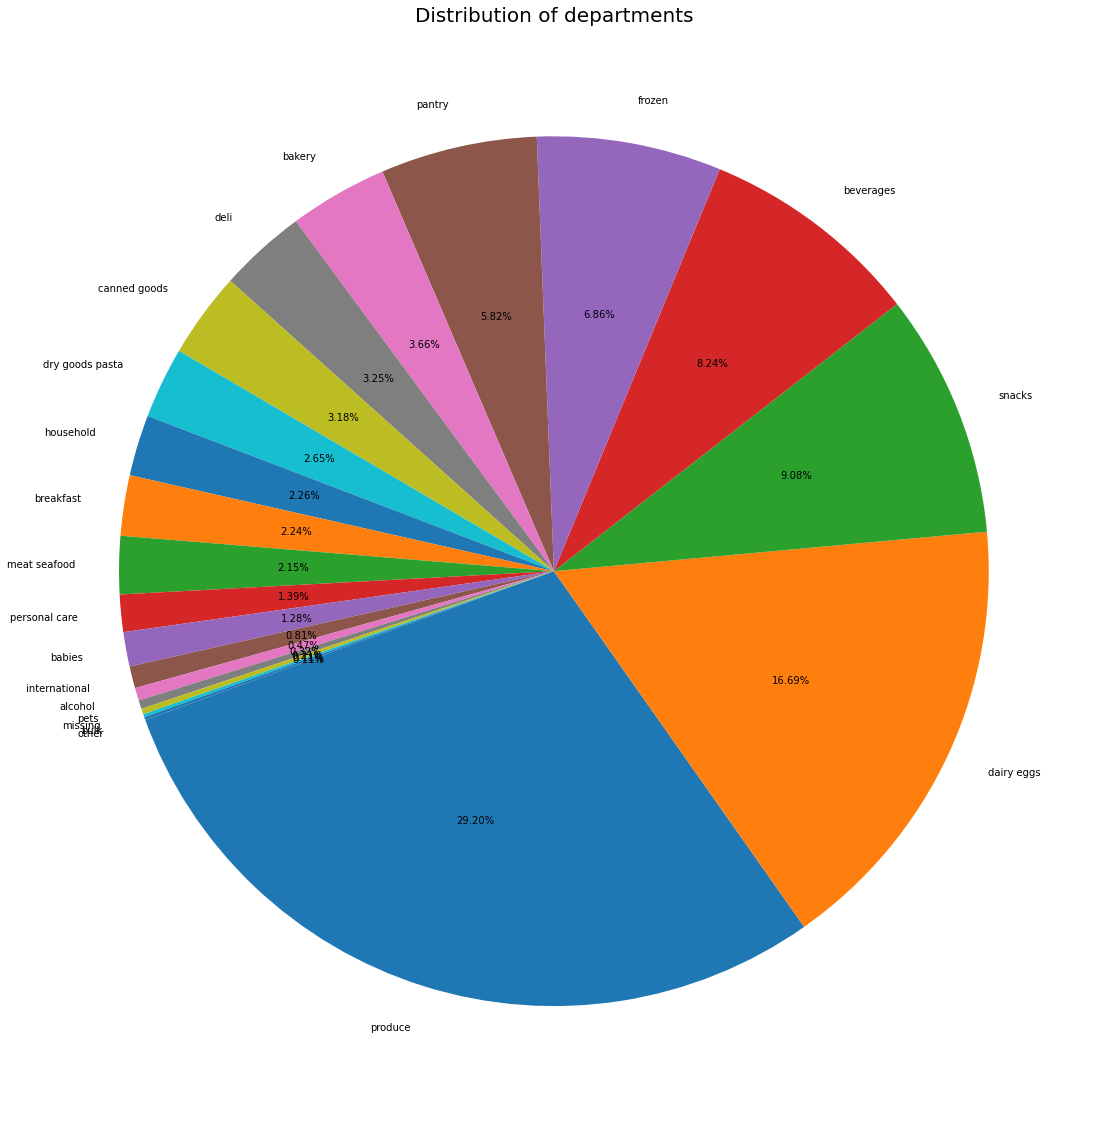

In [64]:
plt.figure(figsize =(20,20))
dep_distribution = data['department'].value_counts()
labels = (np.array(dep_distribution.index))
sizes = (np.array((dep_distribution / dep_distribution.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=200)
plt.title("Distribution of departments", fontsize=20)
plt.show()

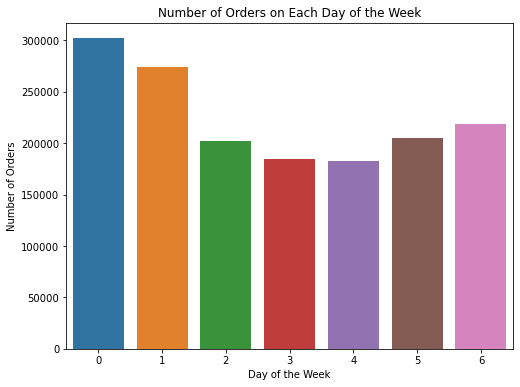

In [67]:
plt.figure(figsize=(8,6))

sns.countplot(x="order_dow", data=data)

plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Number of Orders on Each Day of the Week')
plt.show()

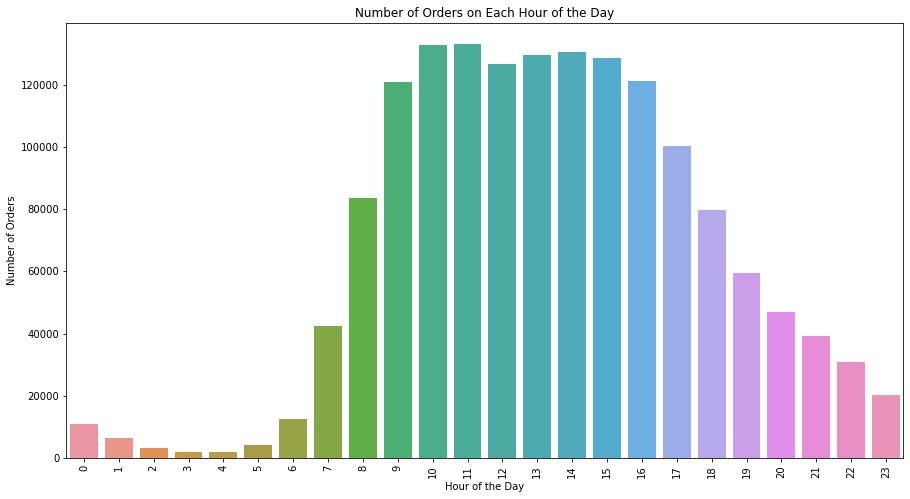

In [69]:
plt.figure(figsize=(15,8))

sns.countplot(x="order_hour_of_day", data=data)

plt.ylabel('Number of Orders')
plt.xlabel('Hour of the Day')
plt.xticks(rotation='vertical')
plt.title('Number of Orders on Each Hour of the Day')
plt.show()

### Finding out the products that are ordered most by the users

In [71]:
data.product_name.value_counts()[0:30]

Banana                                  23270
Bag of Organic Bananas                  18345
Organic Strawberries                    13054
Organic Baby Spinach                    11540
Organic Hass Avocado                    10663
Organic Avocado                          8896
Large Lemon                              7874
Limes                                    6851
Organic Raspberries                      6618
Strawberries                             6471
Organic Whole Milk                       6415
Organic Yellow Onion                     5400
Organic Garlic                           5352
Organic Zucchini                         5233
Organic Blueberries                      4981
Cucumber Kirby                           4556
Organic Lemon                            4445
Apple Honeycrisp Organic                 4278
Organic Grape Tomatoes                   4216
Organic Fuji Apple                       4199
Organic Half & Half                      3955
Honeycrisp Apple                  

### Checking the percentage of reorder by the users

In [75]:
(data.reordered.sum()/data.shape[0])*100

59.228690012606265

### checking the frequency of reordering by the user using a plot

### Feature Engineering

#### Product features

In [3]:
#An empty dataframe is created and product information is added
product_features = pd.DataFrame(columns=['product_id'])
product_features['product_id'] = data['product_id'].sort_values().unique()

In [4]:
df = pd.DataFrame({'reorder_freq' : data.groupby(['product_id','reordered'])['reordered'].count().groupby(level = 0).apply(lambda x : x/float(x.sum()))}).reset_index()

In [5]:
#data o freordered products
df_new = df[df['reordered'] == 1]
df_new['reorder_freq'] = df_new['reorder_freq'] * df_new['reordered']

In [6]:
df[df['reordered'] == 0].head()

,product_id,reordered,reorder_freq
0,1,0,0.311828
2,2,0,1.000000
3,3,0,0.250000
5,4,0,0.500000
7,7,0,1.000000


In [13]:
 #handling for products which were never reordered, hence reorder_rate = 0.0
df_new1 = df[(df['reordered'] == 0) & (df['reorder_freq'] == float(1.0))]
df_new1['reorder_freq'] = df_new1['reorder_freq'] * df_new1['reordered']
df_new = df_new.append(df_new1)

In [14]:
df_new

,product_id,reorder_freq,reordered
0,1,0.688172,NaN
1,2,0.000000,NaN
2,3,0.750000,NaN
3,4,0.500000,NaN
4,7,0.000000,NaN
...,...,...,...
57895,49664,0.000000,0.0
57914,49676,0.000000,0.0
57929,49685,0.000000,0.0
57930,49686,0.000000,0.0


In [15]:
#drop the 'reordered' column of df_new and and sort it according to product id to
#align it with the product_features dataframe
df_new.drop('reordered',axis = 1,inplace= True)
df_new.sort_values(by = 'product_id',inplace= True)
df_new = df_new.reset_index(drop = True)

In [16]:
#add the reorder_freq to product_features dataframe
product_features['product_reorder_freq'] = df_new['reorder_freq']

product_features.head()

,product_id,product_reorder_freq,avg_pos_incart
0,1,0.688172,4.333333
1,2,0.000000,14.500000
2,3,0.000000,20.250000
3,4,0.750000,6.625000
4,7,0.500000,1.000000


In [17]:
#get the average position of the product in the cart,sort by product name
avg_position = data.groupby('product_id')['add_to_cart_order'].mean().reset_index(name = 'avg_position')
avg_position.sort_values(by = 'product_id',inplace = True)
product_features['avg_pos_incart'] = avg_position['avg_position']

In [19]:
#Generating boolean values to check if the products belong to the below categories
df_products['organic'] = df_products['product_name'].apply(lambda i : 'organic' in i.lower()).astype(int)
df_products['Isyogurt'] = df_products['aisle_id'].apply(lambda i : i == 120).astype(int)


df_products['Isproduce'] = df_products['department_id'].apply(lambda i : i == 4).astype(int)
df_products['ISfrozen'] = df_products['department_id'].apply(lambda i : i == 1).astype(int)
df_products['Isdairy'] = df_products['department_id'].apply(lambda i : i== 16).astype(int)
df_products['Isbreakfast'] = df_products['department_id'].apply(lambda i : i == 14).astype(int)
df_products['Issnacks'] = df_products['department_id'].apply(lambda i : i == 19).astype(int)
df_products['Isbeverage'] = df_products['department_id'].apply(lambda i : i == 7).astype(int)

In [21]:
new_features_products = df_products[['organic','Isyogurt','Isproduce','ISfrozen','Isdairy','Isbreakfast','Issnacks','Isbeverage']] 

In [22]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [23]:
nmf = NMF(n_components=3)
model = nmf.fit(new_features_products)
W = model.transform(new_features_products)
products_data = pd.DataFrame(normalize(W))

In [24]:
products_data.columns = ['reduced_feature_p1','reduced_feature_p2','reduced_feature_p3']

In [25]:
df_products.drop(['organic','Isyogurt','Isproduce','ISfrozen','Isdairy','Isbreakfast','Issnacks','Isbeverage'],axis = 1,inplace= True)

In [26]:
product_features['reduced_feat_p1'] = products_data['reduced_feature_p1']
product_features['reduced_feat_p2'] = products_data['reduced_feature_p2']
product_features['reduced_feat_p3'] = products_data['reduced_feature_p3']

In [27]:
#Top 10 aisles from which the products we ordered the most
data.aisle.value_counts()[0:10]

fresh fruits                     177703
fresh vegetables                 164269
packaged vegetables fruits        84231
yogurt                            70665
packaged cheese                   46506
milk                              42910
water seltzer sparkling water     40560
chips pretzels                    35647
soy lactosefree                   31445
bread                             28721
Name: aisle, dtype: int64

In [28]:
#Top 10 departments from which the products we ordered the most
data.department.value_counts()[0:10]

produce            457982
dairy eggs         261742
snacks             142423
beverages          129267
frozen             107505
pantry              91346
bakery              57386
deli                50937
canned goods        49932
dry goods pasta     41564
Name: department, dtype: int64

In [29]:
#Get aisle reorder frequency
df = data.groupby(['aisle']).size().reset_index(name = 'no_of_orders')
aisle_reorder_freq = data[data['reordered'] == 1].groupby(['aisle']).size().reset_index(name = 'reorder_freq')
df['aisle_reorder_freq'] = aisle_reorder_freq['reorder_freq']/df['no_of_orders']
df.drop(['no_of_orders'],axis=1,inplace= True)
df_new = pd.merge(data,df,on = 'aisle')

In [30]:
#Get the departmet reorder frequency
df = data.groupby(['department']).size().reset_index(name = 'no_of_orders')
aisle_reorder_freq = data[data['reordered'] == 1].groupby(['aisle']).size().reset_index(name = 'reorder_freq')
df['dept_reorder_freq'] = aisle_reorder_freq['reorder_freq']/df['no_of_orders']
df.drop(['no_of_orders'],axis=1,inplace= True)
df_new = pd.merge(df_new,df,on = 'department')

In [31]:
df_new = df_new[['product_id','aisle_id','department_id','aisle_reorder_freq','dept_reorder_freq']]
df_new.drop_duplicates(keep = 'first',inplace= True)

In [32]:
product_features = pd.merge(product_features,df_new,on = 'product_id',how = 'inner')

In [33]:
product_features.head()

,product_id,product_reorder_freq,avg_pos_incart,reduced_feat_p1,reduced_feat_p2,reduced_feat_p3,aisle_id,department_id,aisle_reorder_freq,dept_reorder_freq
0,1,0.688172,4.333333,1.0,0.0,0.0,61,19,0.566932,0.040590
1,2,0.000000,14.500000,0.0,0.0,0.0,104,13,0.154663,0.031408
2,3,0.000000,20.250000,0.0,0.0,1.0,94,7,0.538480,0.001122
3,4,0.750000,6.625000,0.0,1.0,0.0,38,1,0.558919,0.005804
4,7,0.500000,1.000000,0.0,0.0,0.0,98,7,0.578525,0.001122


In [34]:
#checking for common products
from collections import Counter
x = df_products['product_name'].values.tolist()
x = " ".join(x).split()
Counter(x).most_common()

[('&', 5203),
 ('Organic', 4903),
 ('Chocolate', 2401),
 ('Cheese', 1990),
 ('Free', 1819),
 ('Chicken', 1494),
 ('Original', 1436),
 ('with', 1432),
 ('Cream', 1241),
 ('Sauce', 1190),
 ('Yogurt', 1123),
 ('Mix', 1104),
 ('Natural', 1096),
 ('Milk', 1067),
 ('Whole', 1064),
 ('Tea', 1061),
 ('Vanilla', 1041),
 ('Butter', 1025),
 ('White', 1011),
 ('Fruit', 979),
 ('Rice', 967),
 ('Bar', 948),
 ('Juice', 928),
 ('Food', 910),
 ('Oil', 863),
 ('Coconut', 819),
 ('Sweet', 805),
 ('With', 804),
 ('Coffee', 785),
 ('Dark', 770),
 ('and', 761),
 ('Chips', 758),
 ('Fresh', 739),
 ('Strawberry', 720),
 ('Gluten', 717),
 ('Apple', 709),
 ('Green', 706),
 ('Lemon', 692),
 ('100%', 691),
 ('Salt', 667),
 ('Cheddar', 667),
 ('Style', 663),
 ('Black', 661),
 ('Ice', 643),
 ('Honey', 638),
 ('Water', 636),
 ('Roasted', 621),
 ('Soup', 618),
 ('Baby', 617),
 ('Almond', 613),
 ('Flavor', 610),
 ('Red', 600),
 ('Bread', 598),
 ('Fat', 587),
 ('Beef', 584),
 ('Liquid', 579),
 ('Garlic', 578),
 ('Pasta'

#### User related features

In [35]:
#User reorder frequency -- How much is the rate of reorders from the orders placed
user_features = pd.DataFrame(columns = ['user_id'])

#Add the unique user ids from the prior data
user_features['user_id'] = data['user_id'].sort_values().unique()

In [36]:
user_reorder_freq = data.groupby(['user_id','reordered'])['reordered'].count().groupby(level = 0).apply(lambda x : x/float(x.sum())).reset_index(name = 'reorder_freq')
user_reorder_freq = user_reorder_freq.pivot(index = 'user_id',columns = 'reordered',values = 'reorder_freq')
user_reorder_freq = pd.DataFrame(user_reorder_freq.to_records())
user_reorder_freq.columns = ['user_id','0','1']
user_reorder_freq.set_index(['user_id'],inplace = True)
user_reorder_freq.fillna(0,inplace= True)
user_reorder_freq.reset_index(inplace= True)

user_features['user_reorder_freq'] = user_reorder_freq['1']

In [37]:
#Total unique products ordered by each user
user_features['unique_productsby_user'] = data.groupby(['user_id'])['product_name'].nunique().reset_index(name = 'unique')['unique']


In [38]:
#Total number of products ordered by the user
user_features['tot_productsby_user'] = data.groupby(['user_id'])['product_name'].size().reset_index(name = 'count')['count']

In [39]:
#find the average number of products per user(Average cart size of each user)
mean_cartsize = data.groupby(['user_id','order_id'])['add_to_cart_order'].count().reset_index(name = 'cart_size').groupby('user_id')['cart_size'].mean().reset_index()
user_features['user_avg_cartsize'] = mean_cartsize['cart_size']

In [40]:
#get the user product reorder ratio
#Numer of unique products reordered/ordered
mean_cartsize['user_id'] = data['user_id'].sort_values().unique()
mean_cartsize['unique_productsby_user'] = data.groupby(['user_id'])['product_name'].nunique().reset_index(name = 'unique')['unique']
mean_cartsize['user_reordered_products'] = data[data['reordered']==1].groupby(["user_id"])['product_name'].nunique().reset_index(name = 'reordered_unique')['reordered_unique']
mean_cartsize.fillna(0,inplace = True)
user_features['user_reordered_products_ratio'] = mean_cartsize['user_reordered_products'] / mean_cartsize['unique_productsby_user']

In [41]:
user_features.head()

,user_id,user_reorder_freq,unique_productsby_user,tot_productsby_user,user_avg_cartsize,user_reordered_products_ratio
0,2,0.476923,102,195,13.928571,0.362745
1,7,0.669903,68,206,10.300000,0.588235
2,42,0.548872,60,133,8.312500,0.600000
3,64,0.577778,57,135,13.500000,0.491228
4,72,0.680851,15,47,3.916667,0.600000


In [42]:
#Get the average number of days between two orders(
df = data.groupby(['user_id','order_id'])['days_since_prior_order'].max().reset_index(name = 'avg_days_between_orders').groupby('user_id')['avg_days_between_orders'].mean().reset_index()
user_features['user_avg_days_between_orders'] = df['avg_days_between_orders']

In [43]:
user_features.head()

,user_id,user_reorder_freq,unique_productsby_user,tot_productsby_user,user_avg_cartsize,user_reordered_products_ratio,user_avg_days_between_orders
0,2,0.476923,102,195,13.928571,0.362745,15.230769
1,7,0.669903,68,206,10.300000,0.588235,10.684211
2,42,0.548872,60,133,8.312500,0.600000,13.866667
3,64,0.577778,57,135,13.500000,0.491228,10.000000
4,72,0.680851,15,47,3.916667,0.600000,15.272727


#### How frequently a product was ordered in a given hour?

In [44]:
df = data.groupby(['product_id','order_hour_of_day'])['reordered'].size()
df = df/data.groupby(['product_id']).size()
df = df.reset_index(name = 'hour_order_freq')
df.head(30)


,product_id,order_hour_of_day,hour_order_freq
0,1,1,0.021505
1,1,2,0.010753
2,1,7,0.021505
3,1,8,0.043011
4,1,9,0.043011
5,1,10,0.086022
6,1,11,0.043011
7,1,12,0.075269
8,1,13,0.118280
9,1,14,0.086022


#### How frequently a product was reordered in a given day of the week?

In [45]:
df = data.groupby(['product_id','order_dow'])['reordered'].size()
df = df/data.groupby(['product_id']).size()
df = df.reset_index(name = 'day_reorder_freq')
df.head()

,product_id,order_dow,day_reorder_freq
0,1,0,0.182796
1,1,1,0.193548
2,1,2,0.129032
3,1,3,0.118280
4,1,4,0.225806


#### User Product features

In [46]:
user_product_feature = pd.DataFrame(columns = ['user_id','product_id'])

In [47]:
#How frequently the user ordered the product


In [48]:
#simple logistic regression model
log_reg = LogisticRegression(random_state=0, n_jobs = -1)
log_reg.fit(X_train_norm,y_train)

predict_y = log_reg.predict_proba(X_val_norm)

NameError: name 'LogisticRegression' is not defined

In [ ]:
#Decision tree 
grid = {}
grid['max_depth'] = [5,10,15,20]
grid['min_samples_split'] = [2,3,4,5]

dt_clf = DecisionTreeClassifier()
r_search = RandomizedSearchCV(dt_clf, param_distributions=grid, cv = 5, verbose = True, n_jobs = -1)
r_search.fit(X_train, y_train)